<a href="https://colab.research.google.com/github/yelynn99/study-2020-2/blob/master/RF%EC%99%80%20SGD%20vote%20classifier_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



In [10]:
from sklearn.datasets import fetch_openml
import numpy as np
 
# loading the dataset using fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [11]:
X, y= mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

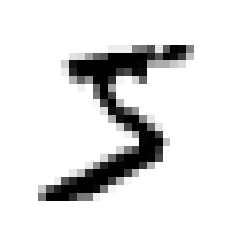

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
 
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()

In [13]:
y = y.astype(np.uint8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [14]:

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
len(X_train), len(X_test), len(y_train), len(y_test)

(60000, 10000, 60000, 10000)

In [15]:
#RandomForestClassifier
clf1 = RandomForestClassifier(n_estimators = 250)
clf1.fit(X_train, y_train)
print( clf1.score(X_test, y_test))

0.9712


In [16]:
#SGD
from sklearn.linear_model import SGDClassifier
clf2=SGDClassifier(loss='log')
clf2.fit(X_train, y_train)
print(clf2.score(X_test, y_test))

0.8913


In [ ]:
#SVC
from sklearn.svm import SVC
clf3= SVC(kernel="rbf",gamma=0.021,C=2.1)
clf3.fit(X_train,y_train)
print(clf3.score(X_test,y_test))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf4=KneighborsClassifier(n_neighbors=42)
clf4.fit(X_train, y_train)
print(clf4.score(X_test,y_test))

In [18]:
clf5 = VotingClassifier([('rf', clf1), ('sgd', clf2)], voting = 'soft')
clf5.fit(X_train, y_train)
clf5.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_base.py:313: RuntimeWarning: invalid value encountered in true_divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))


0.8779

In [19]:
clf6 = VotingClassifier([('rf', clf1), ('sgd', clf2)], voting = 'hard')
clf6.fit(X_train, y_train)
clf6.score(X_test, y_test)

0.9254